# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 50
- N = [60, 200, 20]
- Data = 10K

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
N = list(range(60, 201, 20))
character_error_rate = []
sentance_error_rate = []
print(N)

[60, 80, 100, 120, 140, 160, 180, 200]


# Prepare dataset

N : 60


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-27 12:06:08,202 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-27 12:06:44,855 INFO   Finished epoch 1: Train loss: 12.6001,

N : 80


2019-02-27 12:43:45,710 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 12:44:47,901 INFO   Finished epoch 1: Train loss: 15.0133, Dev loss: 12.5148, Accuracy(Character): 0.1445, Accuracy(Word): 0.0000
2019-02-27 12:45:48,189 INFO   Finished epoch 2: Train loss: 11.7171, Dev loss: 12.0232, Accuracy(Character): 0.1538, Accuracy(Word): 0.0000
2019-02-27 12:46:51,002 INFO   Finished epoch 3: Train loss: 9.4667, Dev loss: 9.0795, Accuracy(Character): 0.2124, Accuracy(Word): 0.0000
2019-02-27 12:47:51,719 INFO   Finished epoch 4: Train loss: 7.7311, Dev loss: 11.5215, Accuracy(Character): 0.1850, Accuracy(Word): 0.0000
2019-02-27 12:48:50,765 INFO   Finished epoch 5: Train loss: 7.4576, Dev loss: 20.1940, Accuracy(Character): 0.1680, Accuracy(Word): 0.0000
2019-02-27 12:49:52,965 INFO   Finished epoch 6: Train loss: 6.3104, Dev loss: 5.5440, Accuracy(Character): 0.3771, Accur

N : 100


2019-02-27 13:35:32,153 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 13:36:48,949 INFO   Finished epoch 1: Train loss: 17.4610, Dev loss: 14.4312, Accuracy(Character): 0.1237, Accuracy(Word): 0.0000
2019-02-27 13:38:06,089 INFO   Finished epoch 2: Train loss: 13.3962, Dev loss: 14.1672, Accuracy(Character): 0.1331, Accuracy(Word): 0.0000
2019-02-27 13:39:26,444 INFO   Finished epoch 3: Train loss: 12.3606, Dev loss: 14.1815, Accuracy(Character): 0.1591, Accuracy(Word): 0.0000
2019-02-27 13:40:39,302 INFO   Finished epoch 4: Train loss: 10.9183, Dev loss: 11.2176, Accuracy(Character): 0.1590, Accuracy(Word): 0.0000
2019-02-27 13:41:57,979 INFO   Finished epoch 5: Train loss: 8.7748, Dev loss: 6.4559, Accuracy(Character): 0.3333, Accuracy(Word): 0.0106
2019-02-27 13:43:15,340 INFO   Finished epoch 6: Train loss: 5.0458, Dev loss: 6.2608, Accuracy(Character): 0.3393, Acc

N : 120


2019-02-27 14:38:57,646 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 14:40:23,082 INFO   Finished epoch 1: Train loss: 19.3522, Dev loss: 16.6502, Accuracy(Character): 0.0963, Accuracy(Word): 0.0000
2019-02-27 14:41:51,193 INFO   Finished epoch 2: Train loss: 15.1788, Dev loss: 16.4636, Accuracy(Character): 0.1037, Accuracy(Word): 0.0000
2019-02-27 14:43:09,446 INFO   Finished epoch 3: Train loss: 14.2855, Dev loss: 15.4025, Accuracy(Character): 0.1224, Accuracy(Word): 0.0000
2019-02-27 14:44:26,229 INFO   Finished epoch 4: Train loss: 14.6271, Dev loss: 17.7742, Accuracy(Character): 0.1218, Accuracy(Word): 0.0000
2019-02-27 14:45:42,676 INFO   Finished epoch 5: Train loss: 13.0226, Dev loss: 15.1094, Accuracy(Character): 0.1699, Accuracy(Word): 0.0081
2019-02-27 14:47:04,875 INFO   Finished epoch 6: Train loss: 9.5402, Dev loss: 7.5628, Accuracy(Character): 0.3202, A

N : 140


2019-02-27 15:50:00,800 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 15:51:40,641 INFO   Finished epoch 1: Train loss: 21.1916, Dev loss: 18.9122, Accuracy(Character): 0.0990, Accuracy(Word): 0.0000
2019-02-27 15:53:22,761 INFO   Finished epoch 2: Train loss: 16.4892, Dev loss: 17.6083, Accuracy(Character): 0.0872, Accuracy(Word): 0.0000
2019-02-27 15:55:04,721 INFO   Finished epoch 3: Train loss: 15.5579, Dev loss: 17.6950, Accuracy(Character): 0.1222, Accuracy(Word): 0.0000
2019-02-27 15:56:44,344 INFO   Finished epoch 4: Train loss: 15.9020, Dev loss: 22.1799, Accuracy(Character): 0.1066, Accuracy(Word): 0.0000
2019-02-27 15:58:33,008 INFO   Finished epoch 5: Train loss: 15.1004, Dev loss: 26.0423, Accuracy(Character): 0.1288, Accuracy(Word): 0.1523
2019-02-27 16:00:14,973 INFO   Finished epoch 6: Train loss: 12.9405, Dev loss: 10.7532, Accuracy(Character): 0.2305,

N : 160


2019-02-27 17:16:20,911 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 17:18:26,287 INFO   Finished epoch 1: Train loss: 22.8586, Dev loss: 20.7642, Accuracy(Character): 0.0808, Accuracy(Word): 0.0000
2019-02-27 17:20:23,561 INFO   Finished epoch 2: Train loss: 17.8039, Dev loss: 19.1279, Accuracy(Character): 0.1032, Accuracy(Word): 0.0000
2019-02-27 17:22:26,097 INFO   Finished epoch 3: Train loss: 17.0355, Dev loss: 18.6342, Accuracy(Character): 0.1059, Accuracy(Word): 0.0000
2019-02-27 17:24:16,990 INFO   Finished epoch 4: Train loss: 16.3564, Dev loss: 19.0164, Accuracy(Character): 0.1046, Accuracy(Word): 0.0000
2019-02-27 17:26:11,816 INFO   Finished epoch 5: Train loss: 14.6634, Dev loss: 33.4075, Accuracy(Character): 0.1248, Accuracy(Word): 0.0071
2019-02-27 17:28:05,495 INFO   Finished epoch 6: Train loss: 15.2619, Dev loss: 28.4008, Accuracy(Character): 0.1439,

N : 180


2019-02-27 18:50:28,966 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 18:52:31,777 INFO   Finished epoch 1: Train loss: 23.8210, Dev loss: 21.6038, Accuracy(Character): 0.0767, Accuracy(Word): 0.0000
2019-02-27 18:54:39,771 INFO   Finished epoch 2: Train loss: 19.0384, Dev loss: 20.9712, Accuracy(Character): 0.0921, Accuracy(Word): 0.0000
2019-02-27 18:56:42,550 INFO   Finished epoch 3: Train loss: 17.8900, Dev loss: 21.0724, Accuracy(Character): 0.0920, Accuracy(Word): 0.0000
2019-02-27 18:58:47,686 INFO   Finished epoch 4: Train loss: 18.6455, Dev loss: 24.1611, Accuracy(Character): 0.0936, Accuracy(Word): 0.0000
2019-02-27 19:00:50,158 INFO   Finished epoch 5: Train loss: 17.2921, Dev loss: 34.6105, Accuracy(Character): 0.0758, Accuracy(Word): 0.0000
2019-02-27 19:02:53,032 INFO   Finished epoch 6: Train loss: 24.3747, Dev loss: 46.7379, Accuracy(Character): 0.0643,

N : 200


2019-02-27 20:31:22,101 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 20:33:24,112 INFO   Finished epoch 1: Train loss: 27.8518, Dev loss: 23.7322, Accuracy(Character): 0.0716, Accuracy(Word): 0.0000
2019-02-27 20:35:27,418 INFO   Finished epoch 2: Train loss: 21.2477, Dev loss: 22.9607, Accuracy(Character): 0.0788, Accuracy(Word): 0.0000
2019-02-27 20:37:18,920 INFO   Finished epoch 3: Train loss: 20.0760, Dev loss: 22.1610, Accuracy(Character): 0.0833, Accuracy(Word): 0.0000
2019-02-27 20:38:55,310 INFO   Finished epoch 4: Train loss: 19.2174, Dev loss: 32.2934, Accuracy(Character): 0.0851, Accuracy(Word): 0.1500
2019-02-27 20:40:41,774 INFO   Finished epoch 5: Train loss: 20.6615, Dev loss: 28.7236, Accuracy(Character): 0.0869, Accuracy(Word): 0.0000
2019-02-27 20:42:23,774 INFO   Finished epoch 6: Train loss: 23.6237, Dev loss: 46.1001, Accuracy(Character): 0.0880,

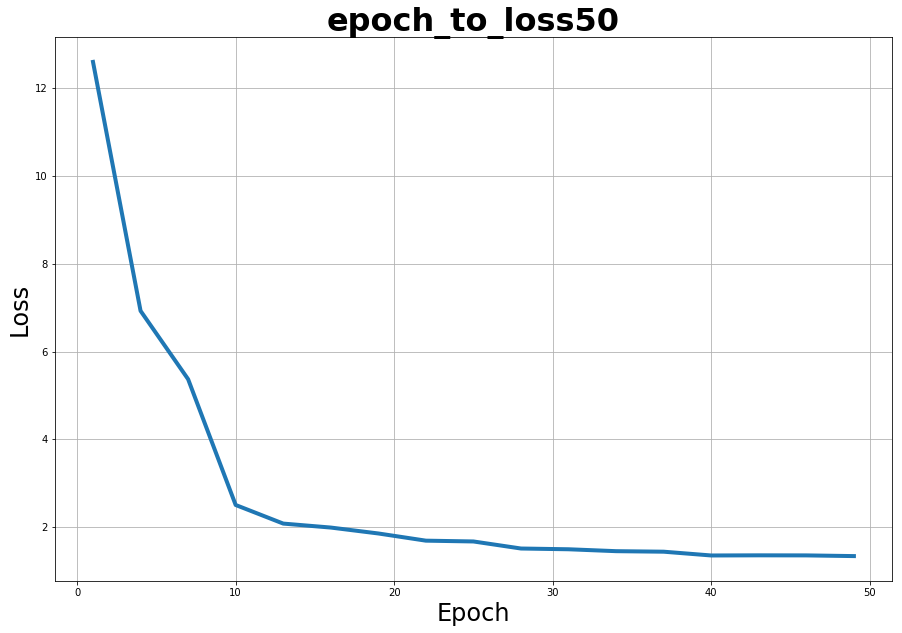

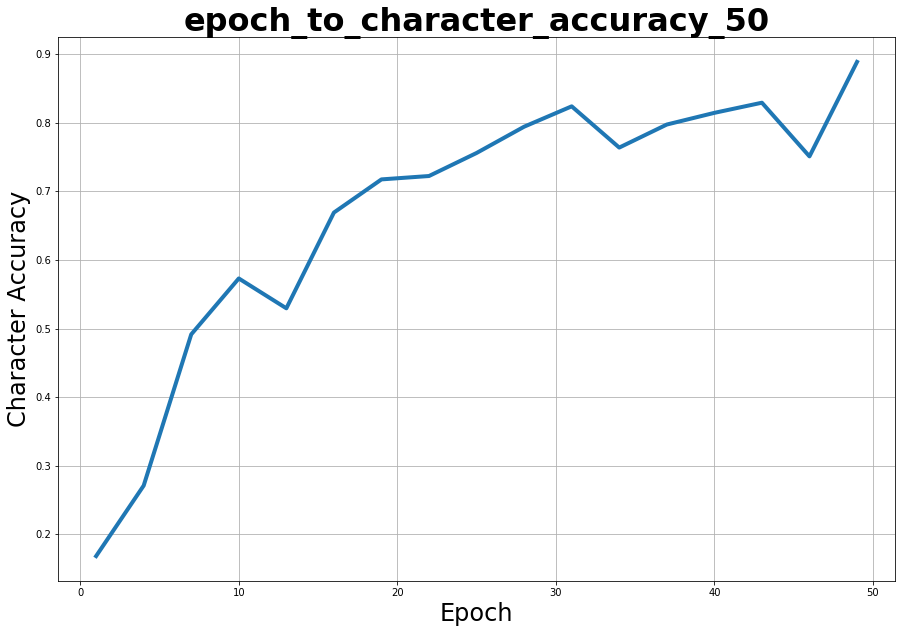

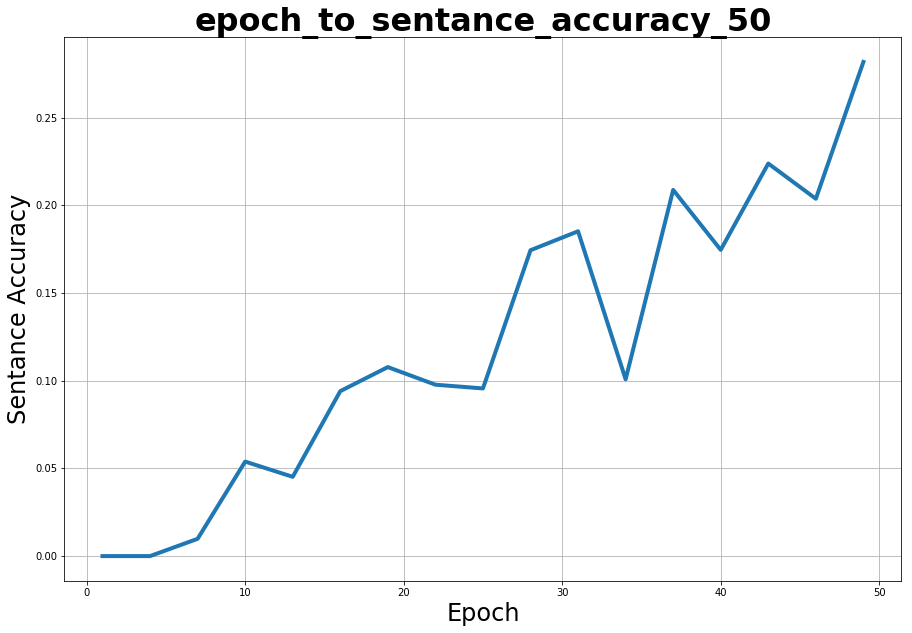

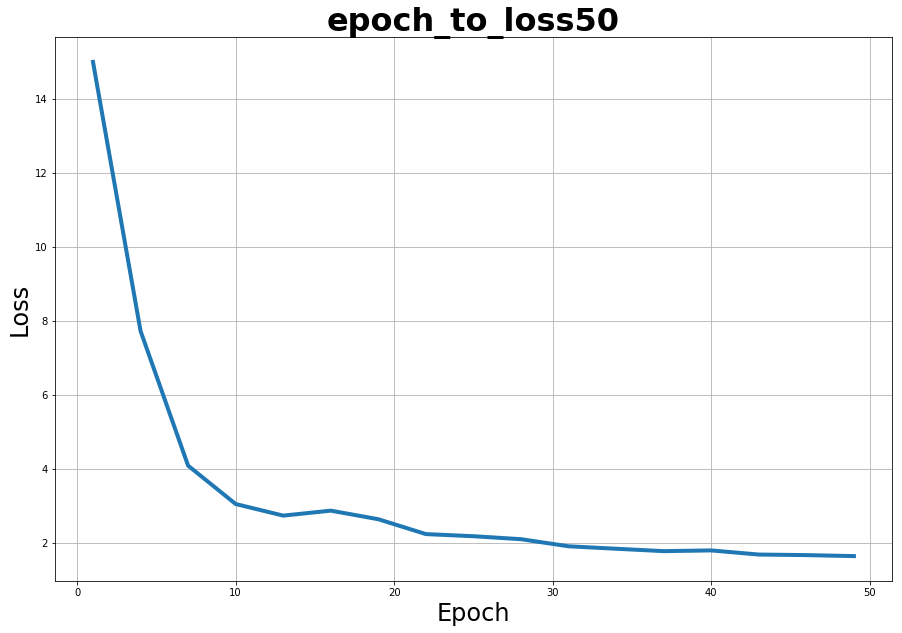

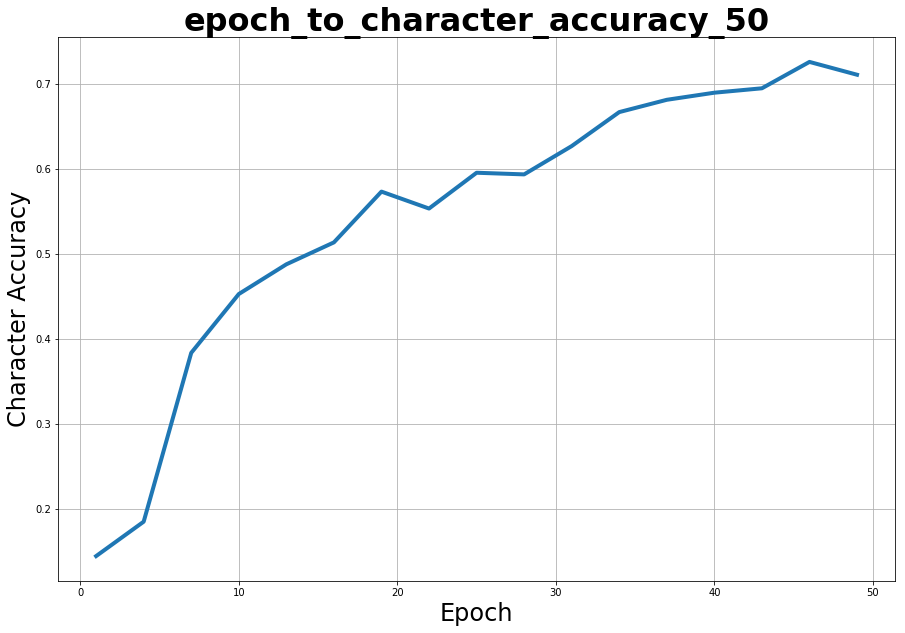

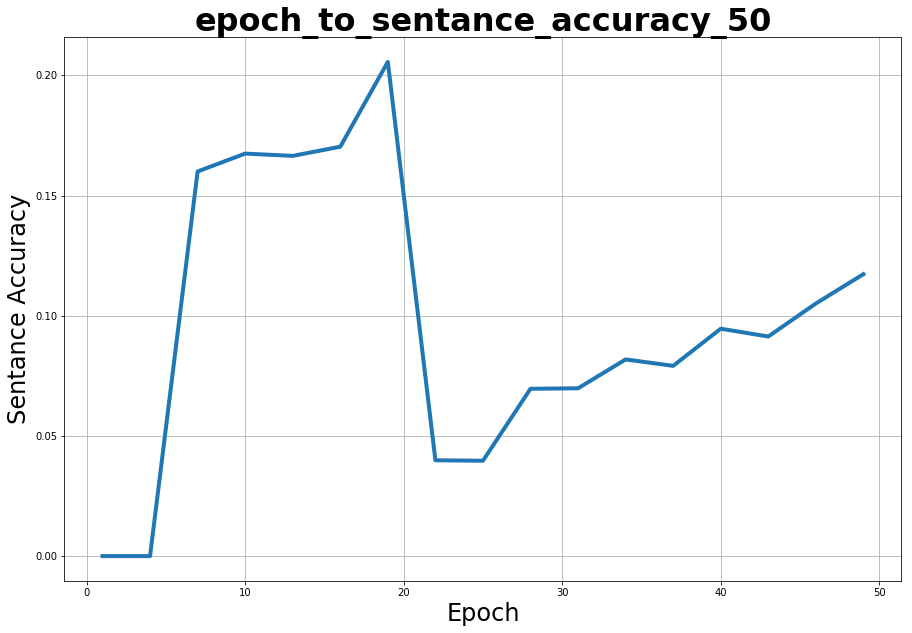

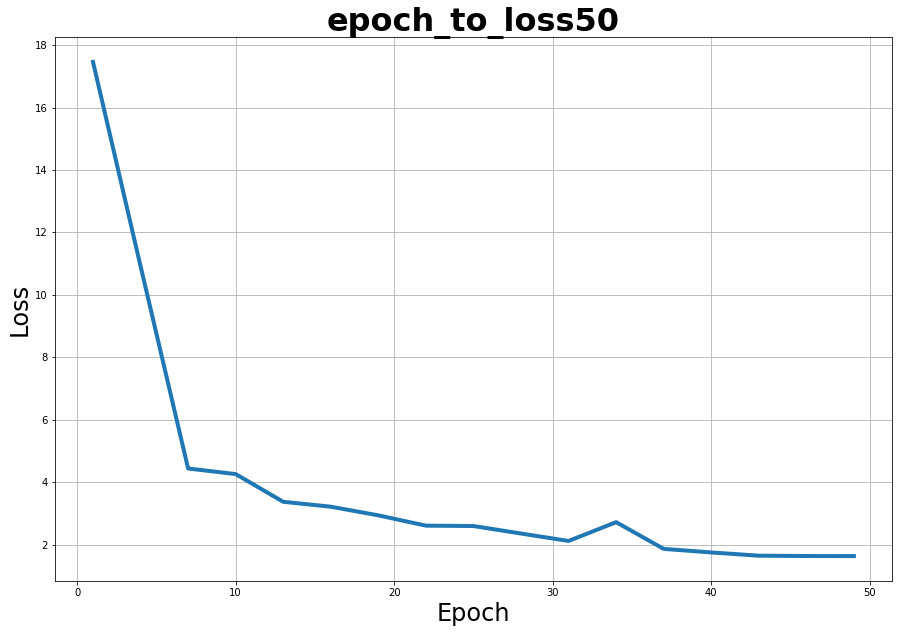

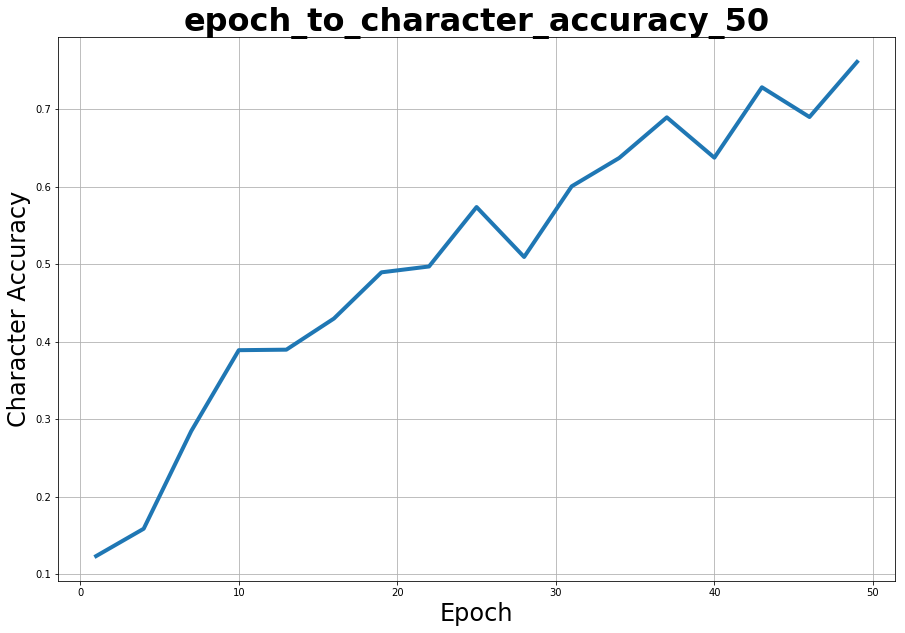

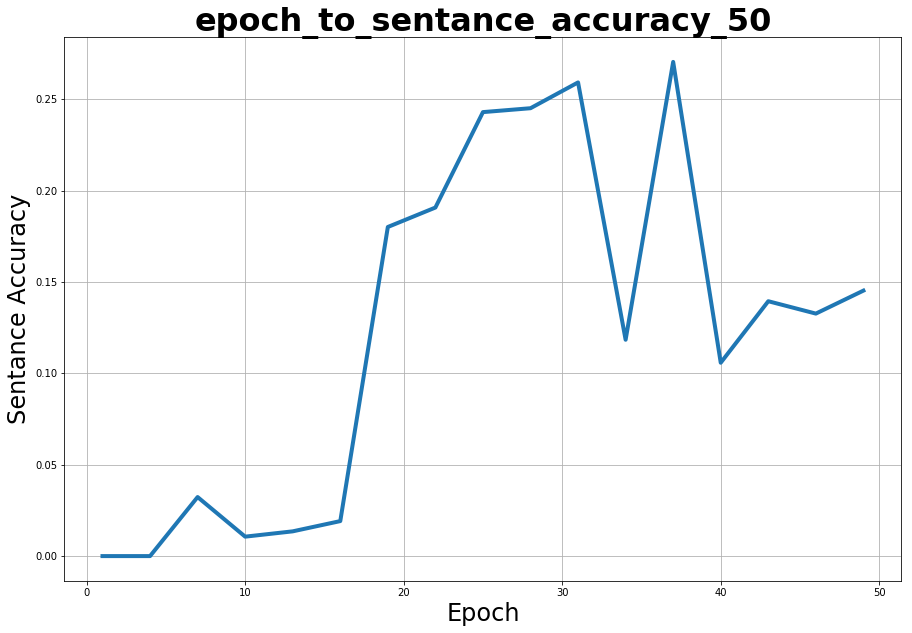

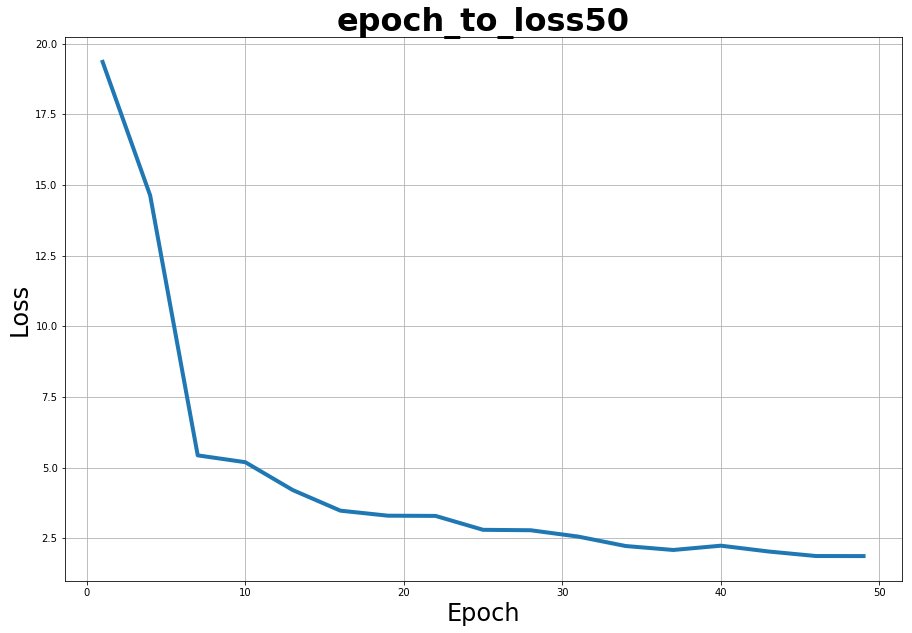

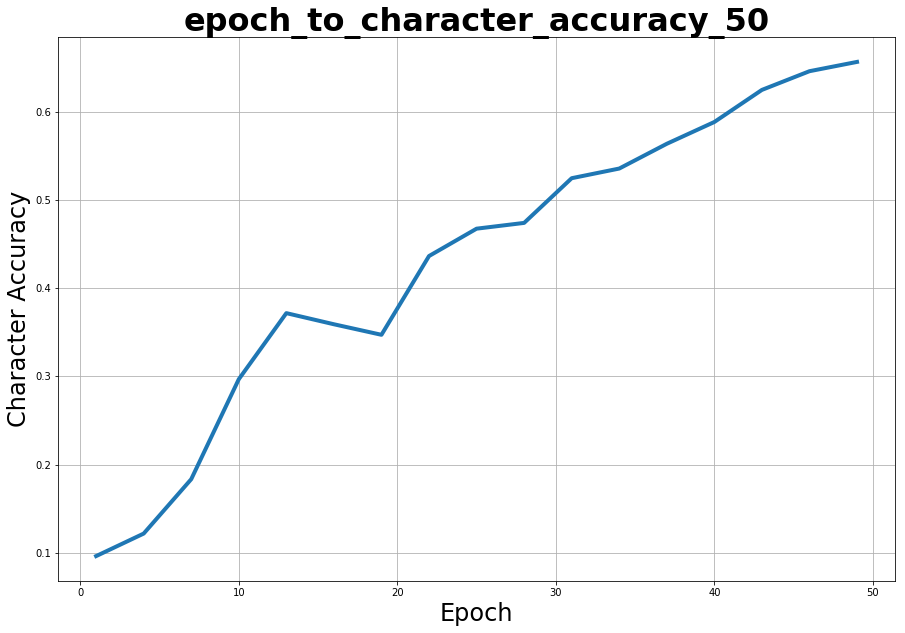

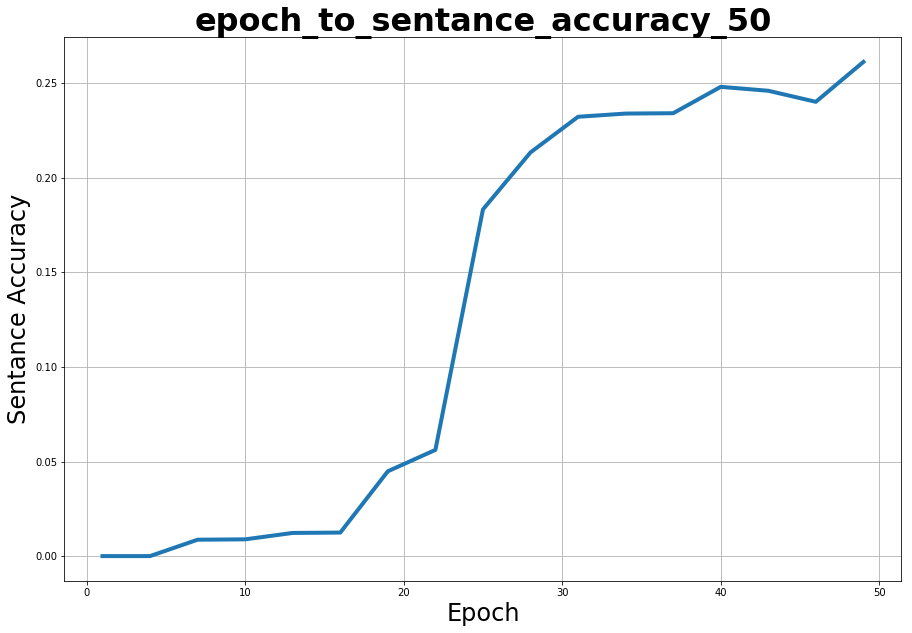

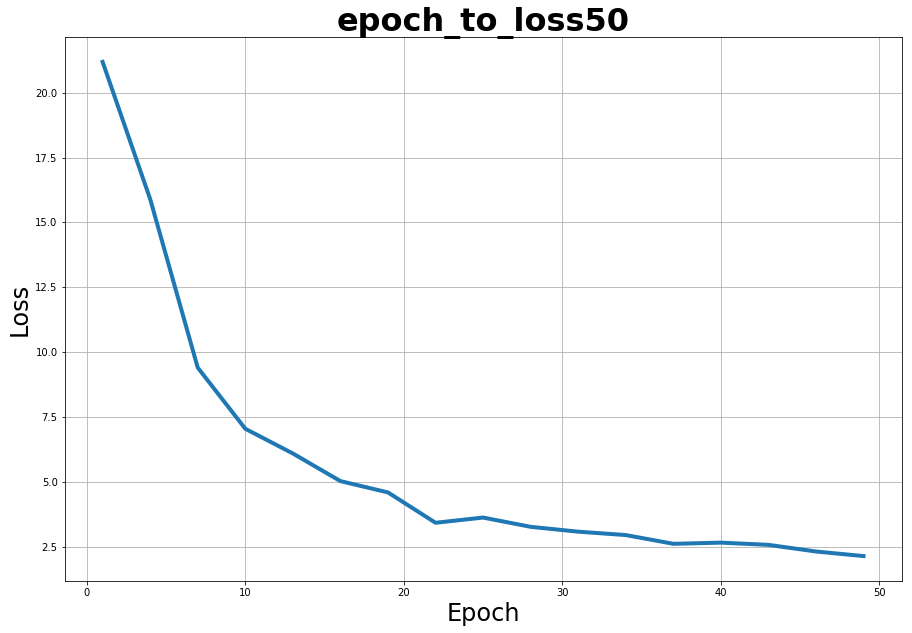

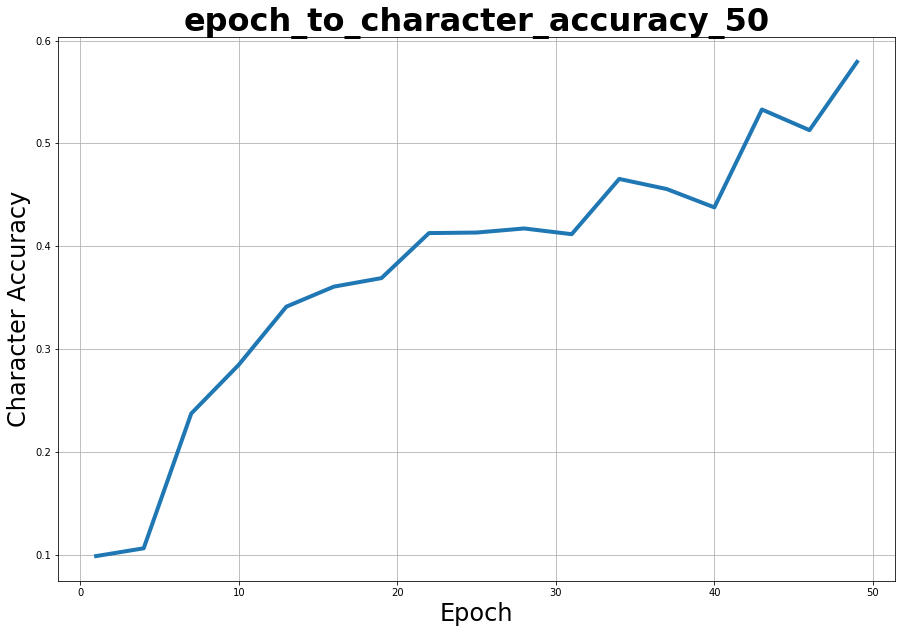

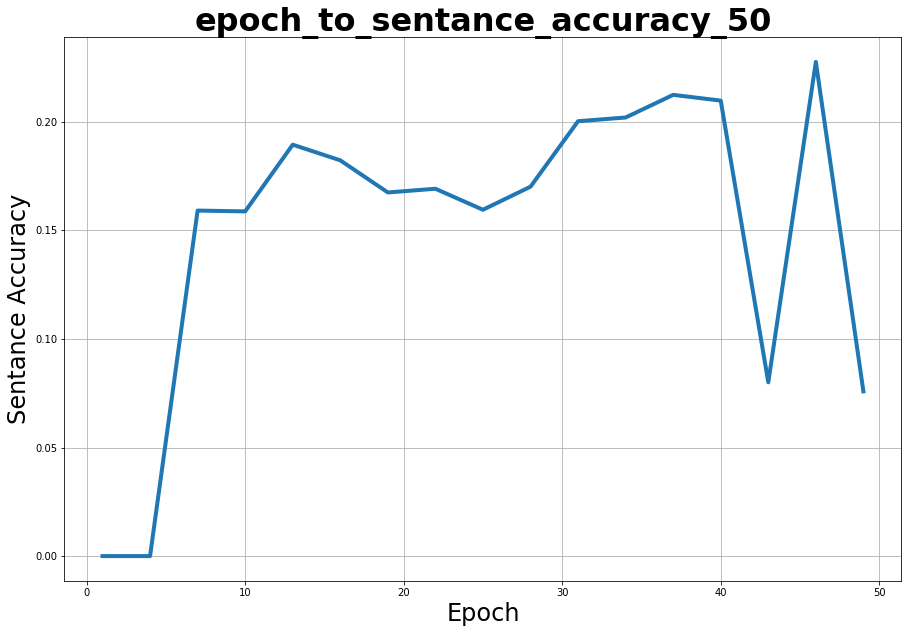

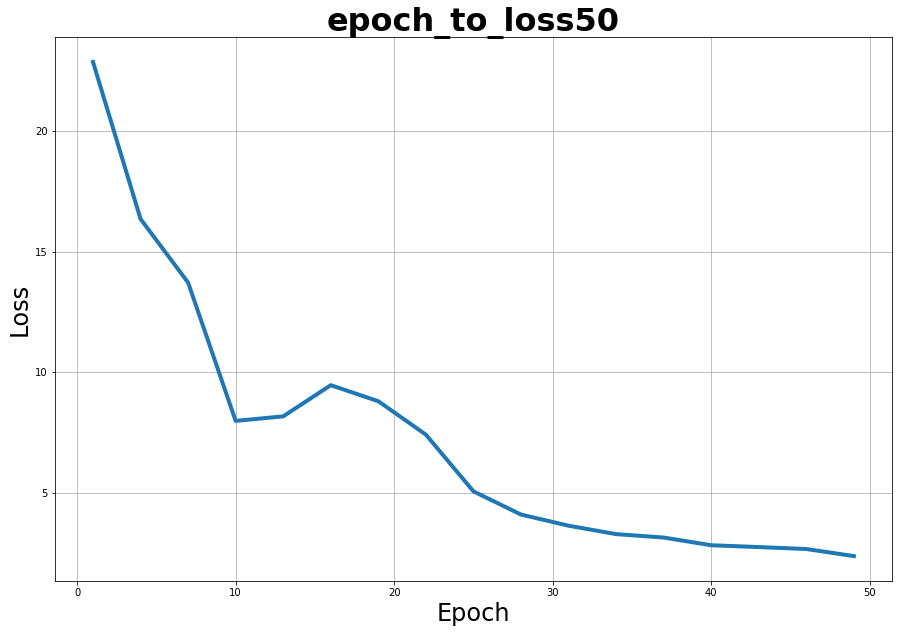

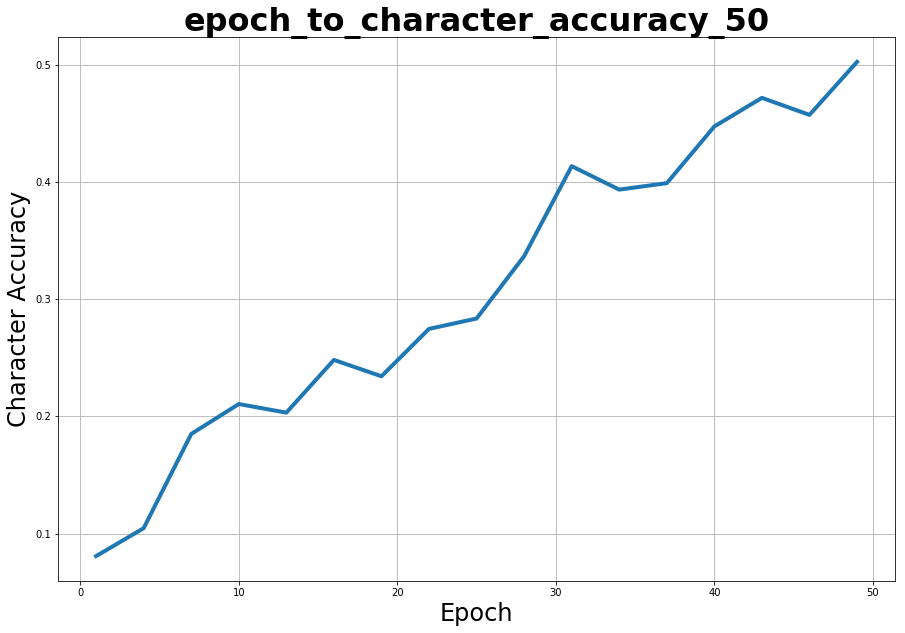

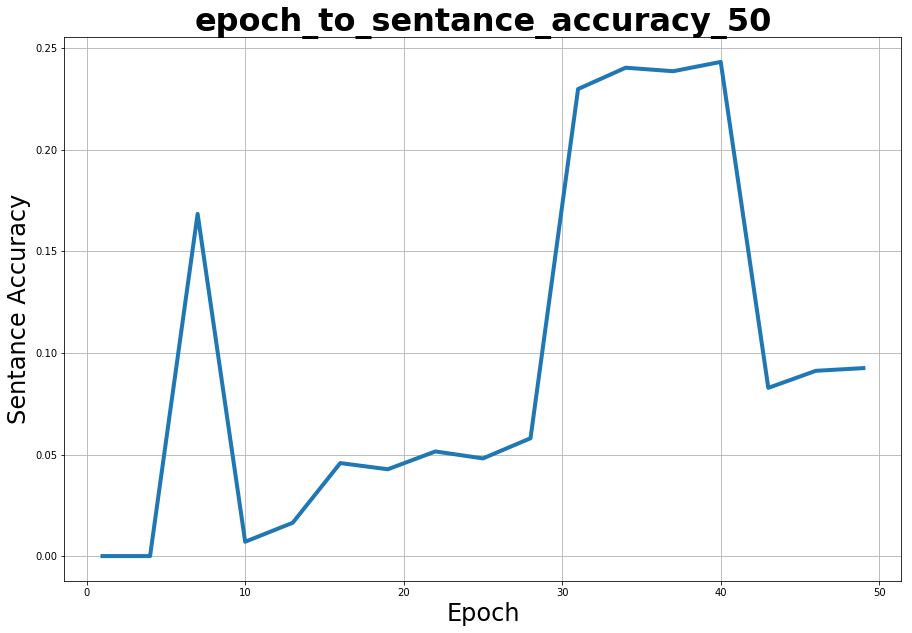

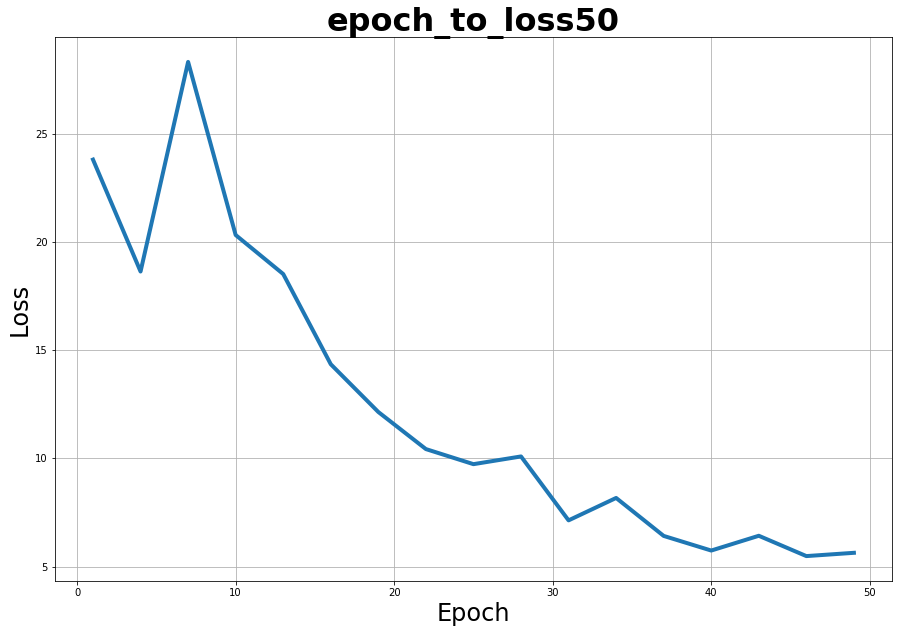

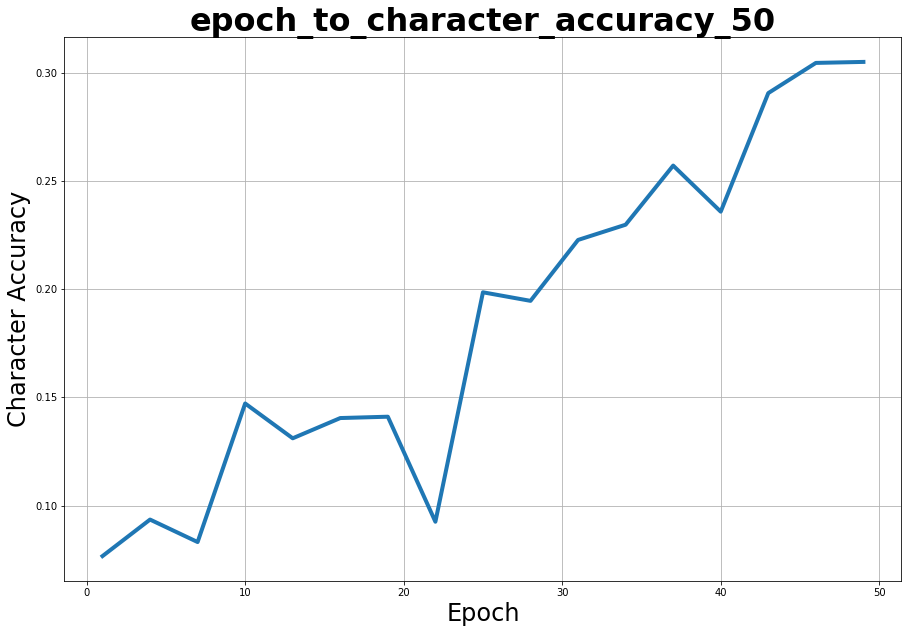

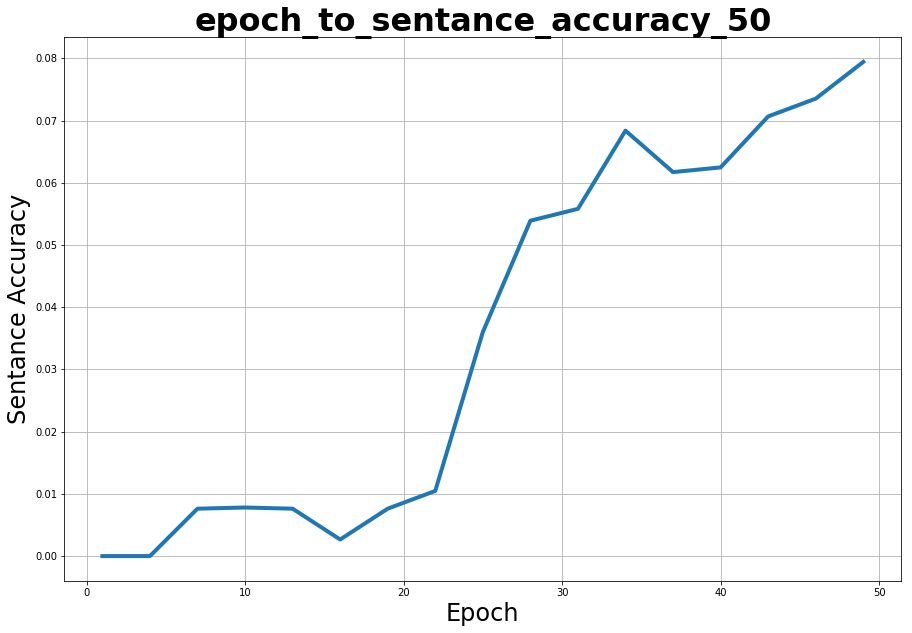

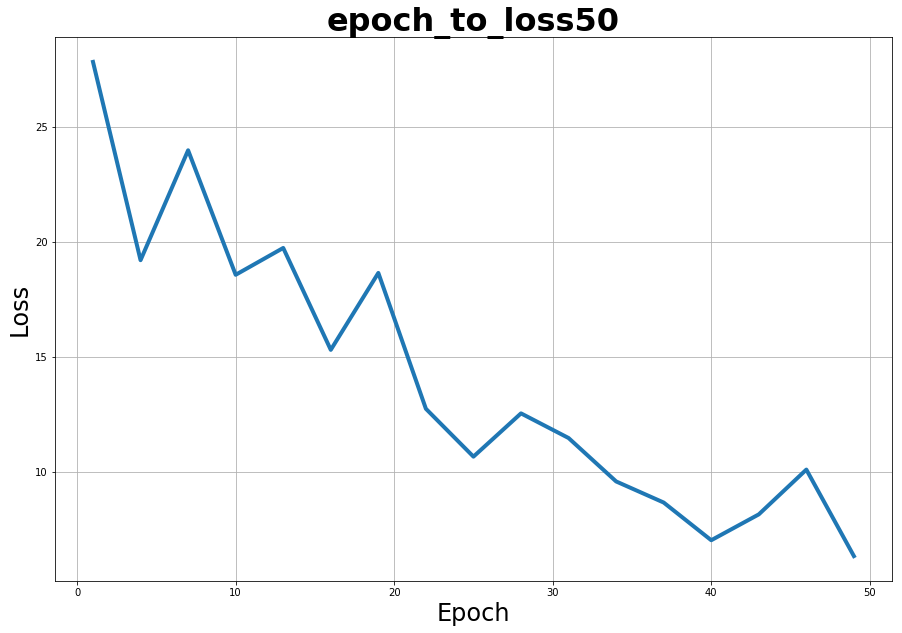

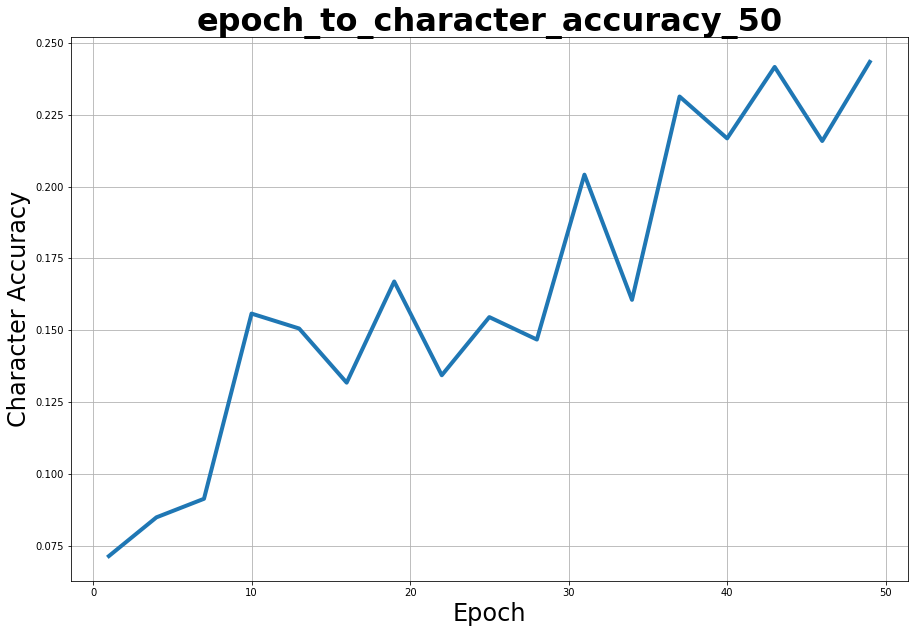

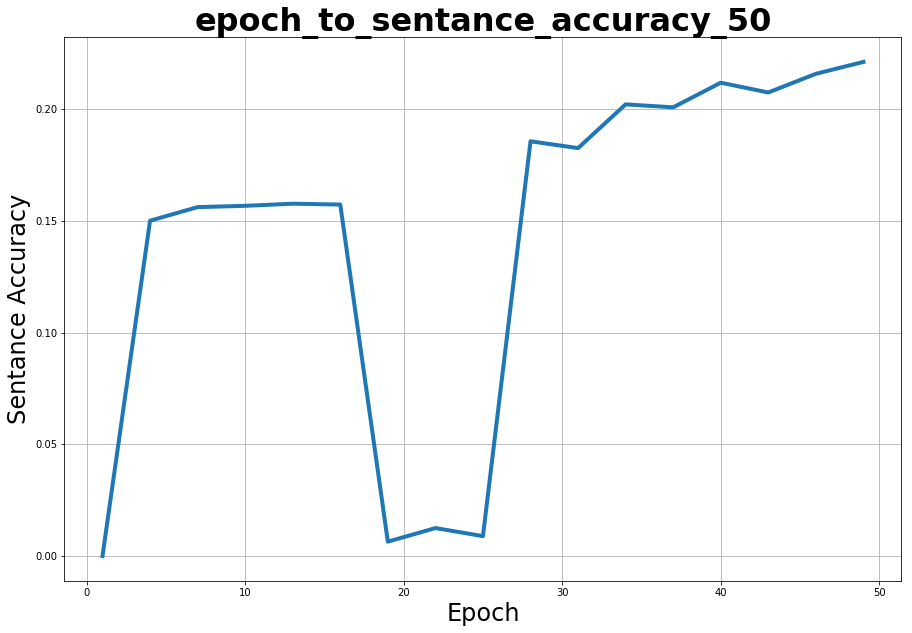

In [4]:
for i in N:
    print("N : %d" % i)
    train_path = "data/bracket/Length/N" + str(i) + "_data_train.txt"
    dev_path = "data/bracket/Length/N" + str(i) + "_data_test.txt"

    src = fields.SourceField()
    tgt = fields.TargetField()
    max_len = 204
    def len_filter(example):
        return len(example.src) <= max_len and len(example.tgt) <= max_len
    train = torchtext.data.TabularDataset(
        path=train_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    dev = torchtext.data.TabularDataset(
        path=dev_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    src.build_vocab(train)
    tgt.build_vocab(train)
    input_vocab = src.vocab
    output_vocab = tgt.vocab

    weight = torch.ones(len(tgt.vocab))
    pad = tgt.vocab.stoi[tgt.pad_token]
    loss = Perplexity(weight, pad)
    if torch.cuda.is_available():
        loss.cuda()
    
    optimizer = "Adam"
    hidden_size = 50
    bidirectional = True

    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path="length_to_error_rate/N" + str(i))

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=50, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

    best_character_accuracy = 0
    best_sentance_accuracy = 0
    for i,j in zip(character_accuracy_list, sentance_accuracy_list):
        if best_character_accuracy < i:
            best_character_accuracy = i
        if best_sentance_accuracy < j:
            best_sentance_accuracy = j

    character_error_rate.append(1 - best_character_accuracy)
    sentance_error_rate.append(1 - best_sentance_accuracy)
    
    torch.save(seq2seq.state_dict(), 'log/pth/N' + str(i) + '_model_save.pth')

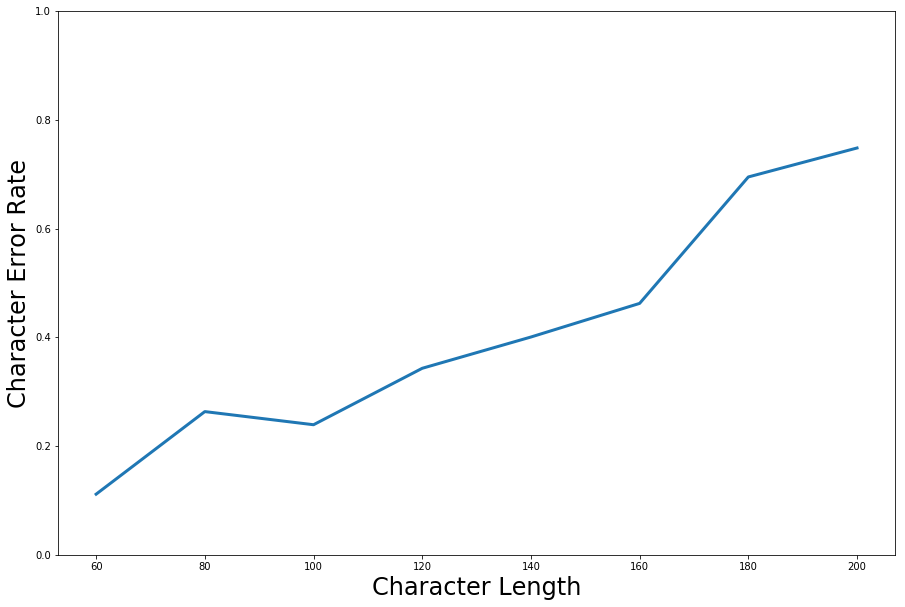

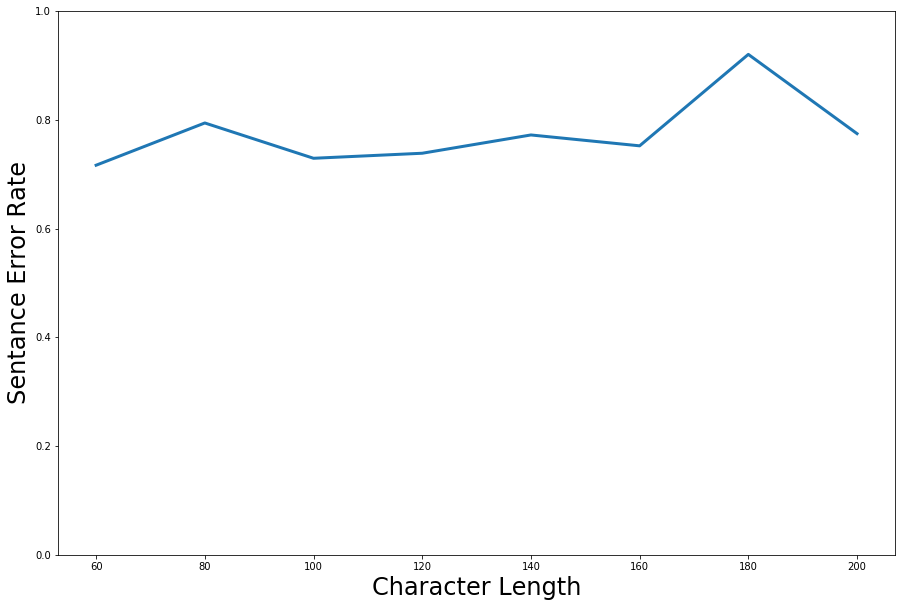

In [8]:
plt.figure(figsize=(15,10))
plt.plot(N, character_error_rate, LineWidth=3)
plt.xlabel('Character Length', fontsize=24)
plt.ylabel('Character Error Rate', fontsize=24)
plt.ylim([0,1])
plt.savefig('log/plot/length_to_error_rate/bracket_length_to_character_error_rate.png')

plt.figure(figsize=(15,10))
plt.plot(N, sentance_error_rate, LineWidth=3)
plt.xlabel('Character Length', fontsize=24)
plt.ylabel('Sentance Error Rate', fontsize=24)
plt.ylim([0,1])
plt.savefig('log/plot/length_to_error_rate/bracket_length_to_sentance_error_rate.png')